In [ ]:
%pip install pandas prophet matplotlib

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dev-achintha/Sri_Lanka-Tourism_Forcasting_Model/prophet/dataset/2014-2024-monthly-tourist-arrivals-sl-csv.csv')
df = df.drop(columns=['PercentageChange'], errors='ignore')
df['ds'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
df.rename(columns={'Arrivals': 'y'}, inplace=True)
df = df[['ds', 'y']]
df.head()

,ds,y
0,2014-01-01,146575
1,2014-02-01,141878
2,2014-03-01,133048
3,2014-04-01,112631
4,2014-05-01,90046


In [3]:
from prophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
                changepoint_prior_scale=0.1, n_changepoints=30)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# changepoints = ['2019-04-21', '2020-03-01', '2022-03-22', '2023-02-25']
#     # 2019-04-21 Easter Bombings
#     # 2020-03-01 Covid19 Pandemic
#     # 2022-03-22 Dollar rate increses
#     # 2023-02-25 Dollar rate decreases
# model = Prophet(changepoints=changepoints)

model.fit(df)

04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future_periods = 24

future = model.make_future_dataframe(periods=future_periods, freq='M')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/usr/local/python/3.12.1/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
147,2026-03-31,-249587.659188,-290913.492432,-203405.713863
148,2026-04-30,-494806.917747,-539593.918417,-449509.676918
149,2026-05-31,-276657.155146,-322655.957234,-230284.333777
150,2026-06-30,-423098.026581,-469711.595308,-380481.239151
151,2026-07-31,-223465.609052,-269315.387673,-174587.474457


/usr/local/python/3.12.1/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/python/3.12.1/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


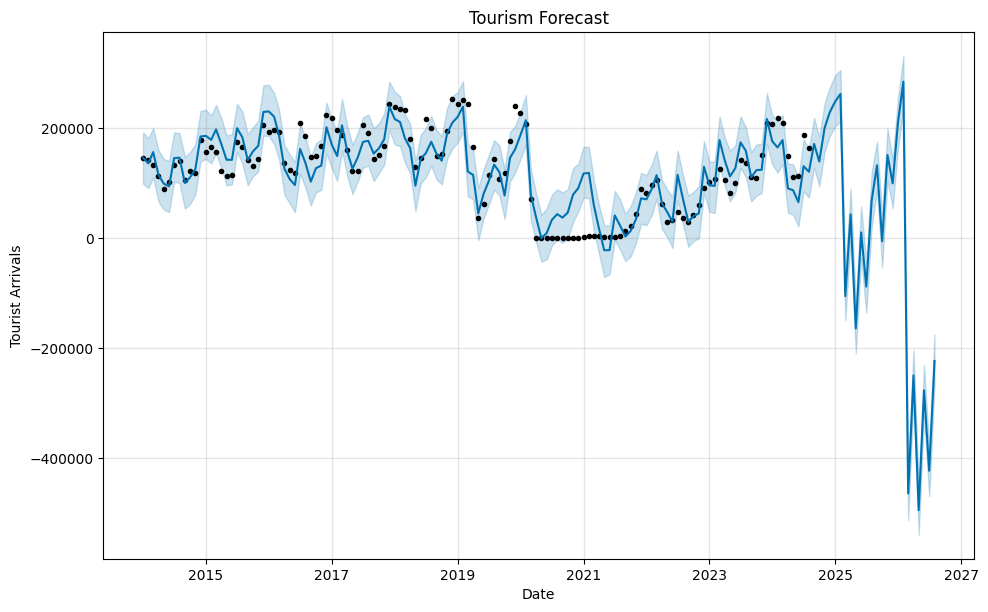

In [5]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title('Tourism Forecast')
plt.xlabel('Date')
plt.ylabel('Tourist Arrivals')
plt.show()


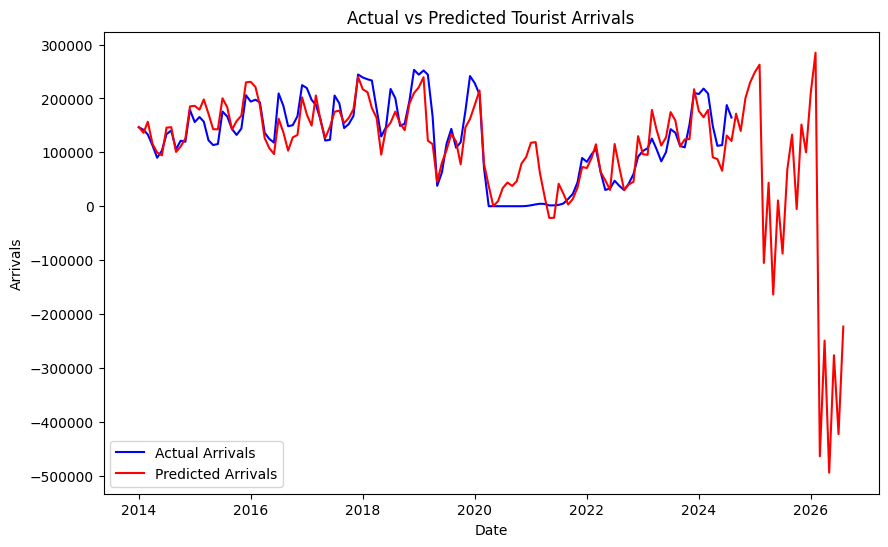

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['ds'], df['y'], label='Actual Arrivals', color='blue')

ax.plot(forecast['ds'], forecast['yhat'], label='Predicted Arrivals', color='red')

ax.set_title('Actual vs Predicted Tourist Arrivals')
ax.set_xlabel('Date')
ax.set_ylabel('Arrivals')
ax.legend()

plt.show()


In [7]:
from sklearn.metrics import mean_absolute_error

actual = df['y']
predicted = forecast.loc[forecast['ds'].isin(df['ds']), 'yhat']

mae = mean_absolute_error(actual, predicted)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 26503.991487202373


In [ ]:
!sudo apt-get update
!sudo apt-get install -y pandoc texlive-xetex texlive-fonts-recommended texlive-plain-generic

!pip insta

In [ ]:
%pip install jupyter_core jupyter

In [8]:
!sudo jupyter nbconvert --to pdf /workspaces/Sri_Lanka-Tourism_Forcasting_Model_SARIMA/notebooks/Sri_Lankan_TourismForecastModel_Prophet.ipynb

Traceback (most recent call last):
  File "/home/codespace/.local/bin/jupyter", line 5, in <module>
    from jupyter_core.command import main
ModuleNotFoundError: No module named 'jupyter_core'
